In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [6]:
def generate_erdos_renyi_graph(N, p):
    graph = np.zeros((N, N), dtype=int)

    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                graph[i, j] = 1
                graph[j, i] = 1

    G = nx.Graph(graph)
    return G

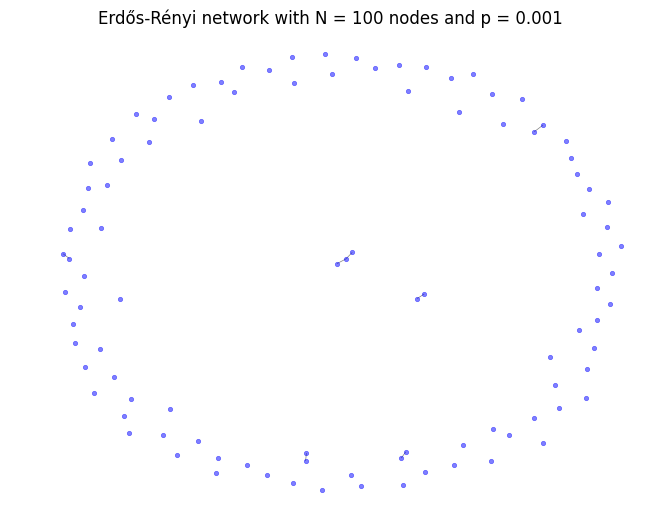

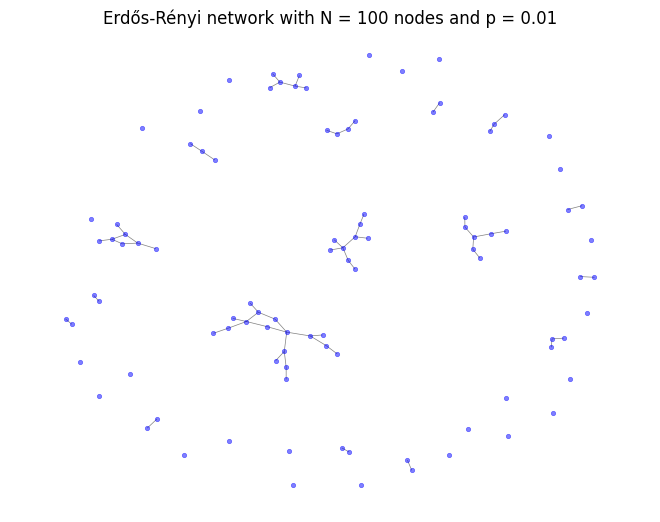

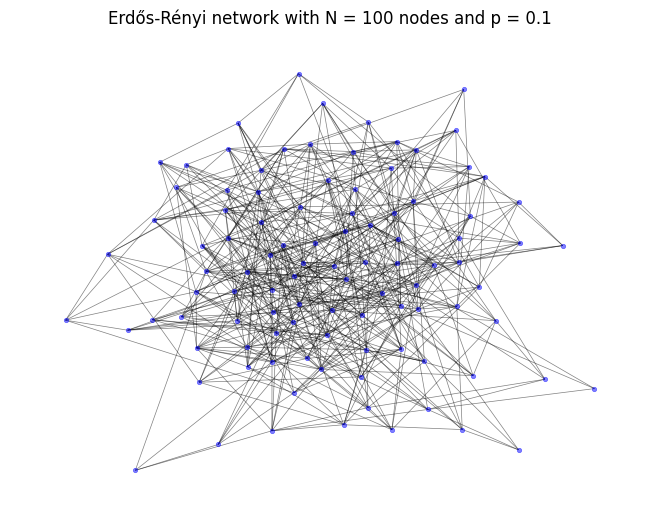

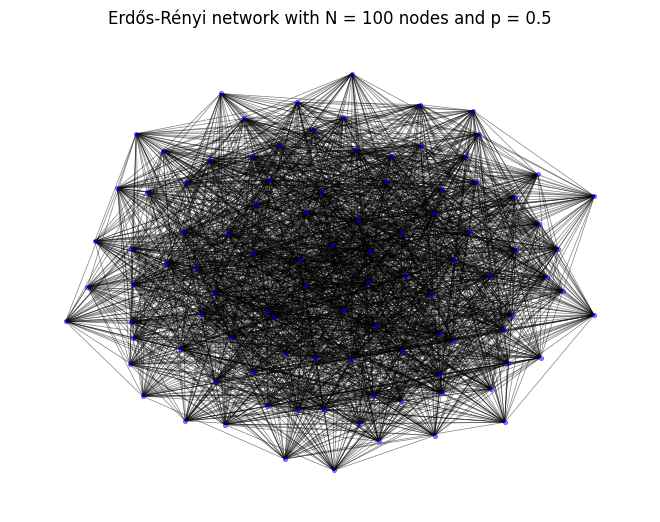

In [12]:
# Using the function you wrote at point (1), generate three Erdős-Rényi networks with N = 100 nodes and link probability (a) p = 0.001, (b) p = 0.01, (c) p = 0.1, and (d) p = 0.5.

N = 100
p = [0.001, 0.01, 0.1, 0.5]
G = [generate_erdos_renyi_graph(N, p_) for p_ in p]

# Provide a visualisation of these networks, in order to emphasize the existence of connected components.

for i in range(len(p)):
    plt.figure(i)
    nx.draw(G[i], pos=nx.spring_layout(G[i]), node_size=10, node_color='blue', edge_color='black', linewidths=0.5, width=0.5, with_labels=False, alpha=0.5)
    plt.title("Erdős-Rényi network with N = 100 nodes and p = " + str(p[i]))

In [20]:
# Generate ER graphs with N = 100 nodes for different edge creation probabilities p ∈ [0, 1] and plot the probability that a node belongs to the largest connected component NG/N as a function of p and mark with a vertical line the critical probability pC = 1/N.

N = 100

p = np.logspace(-4, 0, num=40)
p_nodes_in_largest_connected_component = []
pC = 1 / N

for i in range(40):
    NG = 0
    for j in range(110):
        G = generate_erdos_renyi_graph(N, p[i])
        NG += len(max(nx.connected_components(G), key=len))
    NG /= 110
    p_nodes_in_largest_connected_component.append(NG / N)

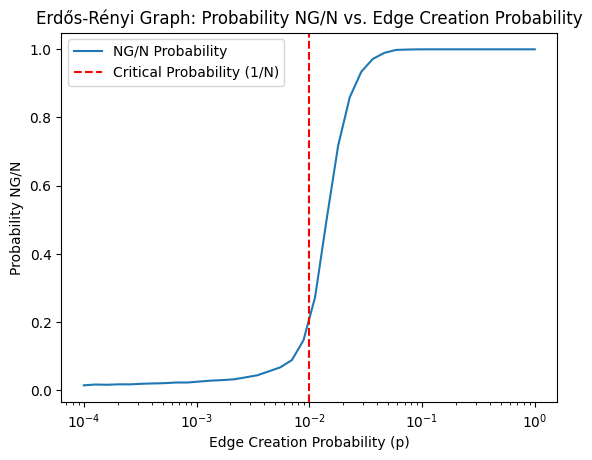

In [21]:
# Mark the critical probability pC = 1/N with a vertical line
critical_probability = 1 / N

# Plot the results
plt.plot(p, p_nodes_in_largest_connected_component, label='NG/N Probability')
plt.axvline(x=critical_probability, color='red', linestyle='--', label='Critical Probability (1/N)')
plt.xscale('log')
plt.xlabel('Edge Creation Probability (p)')
plt.ylabel('Probability NG/N')
plt.title(f'Erdős-Rényi Graph: Probability NG/N vs. Edge Creation Probability')
plt.legend()
plt.show()

In [22]:
# Plot the average clustering ⟨c⟩ as a function of p and give an interpretation of the results.

N = 100

c = []

for i in range(40):
    avg_c = 0
    for j in range(110):
        G = generate_erdos_renyi_graph(N, p[i])
        avg_c += nx.average_clustering(G)
    avg_c /= 110
    c.append(avg_c)

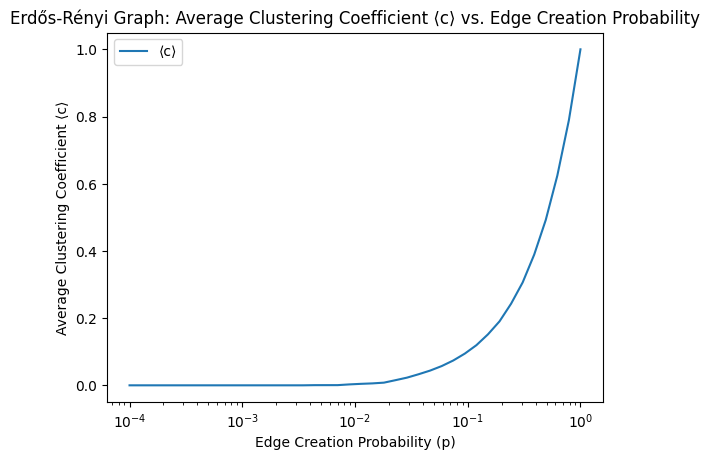

In [23]:
# Plot the results
plt.plot(p, c, label='⟨c⟩')
plt.xscale('log')
plt.xlabel('Edge Creation Probability (p)')
plt.ylabel('Average Clustering Coefficient ⟨c⟩')
plt.title('Erdős-Rényi Graph: Average Clustering Coefficient ⟨c⟩ vs. Edge Creation Probability')
plt.legend()
plt.show()